<a href="https://colab.research.google.com/github/kimdahyeon977/kimdahyeon/blob/master/Happiness%20Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!pip install mpl_toolkits
!pip install pingouin
!pip install missingno --quiet
!pip install folium
!pip install pycountry_convert
!pip install geocoder
!pip install plotly
!pip install pycountry_convert --quiet
!pip install plotly_express
!pip install plotly --quiet



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 4.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 9.8 MB 29.1 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=bd375dbad2ad5d0d66694b73d0324cf01398c7d253fc6c95bf0d1a84deee59ba
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=c8e20a729fc3e72087ca2a1edb700f9aa1a62d253e1ccc1f1b422d98a1b528d3
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting

In [3]:
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import pycountry
from collections import Counter

%matplotlib inline
plt.style.use('fivethirtyeight')

import pycountry_convert as pc
import warnings
warnings.filterwarnings('ignore')

import missingno as msno

# Seaborn Style
sns.set(color_codes = True)
sns.set_style("white")

In [4]:
df = pd.read_csv('/content/drive/Shareddrives/elice/2022_google_csv.csv')
df.head()

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,NaN,NaN,NaN,NaN
1,2,Denmark,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532,NaN,NaN,NaN,NaN
2,3,Iceland,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191,NaN,NaN,NaN,NaN
3,4,Switzerland,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461,NaN,NaN,NaN,NaN
4,5,Netherlands,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419,NaN,NaN,NaN,NaN


#데이터 전처리

In [5]:
df = df.dropna(axis=1)

In [6]:
df.shape

(103, 10)

In [7]:
# Let's inspect the missing values 🐢
data_info= pd.DataFrame()
data_info['Column Names']= df.columns
data_info['Datatype'] = df.dtypes.to_list()
data_info['num_NA']= data_info['Column Names'].apply(lambda x: df[x].isna().sum())
data_info['%_NA']= data_info['Column Names'].apply(lambda x: df[x].isna().mean())
data_info

,Column Names,Datatype,num_NA,%_NA
0,RANK,int64,0,0.0
1,Country,object,0,0.0
2,Happiness score,float64,0,0.0
3,Dystopia (1.83) + residual,float64,0,0.0
4,Explained by: GDP per capita,float64,0,0.0
5,Explained by: Social support,float64,0,0.0
6,Explained by: Healthy life expectancy,float64,0,0.0
7,Explained by: Freedom to make life choices,float64,0,0.0
8,Explained by: Generosity,float64,0,0.0
9,Explained by: Perceptions of corruption,float64,0,0.0


In [8]:
df.describe()

,RANK,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,52.000000,5.758369,1.802524,1.506825,0.957010,0.634777,0.538301,0.151049,0.167981
std,29.877528,1.093350,0.508371,0.401879,0.248076,0.153799,0.143239,0.087588,0.134237
min,1.000000,2.404000,0.216000,0.000000,0.000000,0.197000,0.000000,0.000000,0.005000
25%,26.500000,5.079500,1.572000,1.262000,0.830000,0.551000,0.470500,0.089000,0.068500
50%,52.000000,5.891000,1.894000,1.550000,1.005000,0.655000,0.565000,0.130000,0.134000
75%,77.500000,6.478500,2.128000,1.836500,1.159000,0.770500,0.652500,0.204500,0.209000
max,103.000000,7.821000,2.790000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [9]:
#이상치 제거 함수를 불러온다.
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) #outlier_inidices: 이상치가 발견된 행
    outlier_indices = Counter(outlier_indices) #행의 빈도수를 세준다.
    print(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) #이상치가 2개 이상 발견되면 return 해줌
    return multiple_outliers

In [10]:
col=[i for i in df.columns]
Outliers_to_drop = detect_outliers(df, 2,['Happiness score',
 'Dystopia (1.83) + residual',
 'Explained by: GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption'])

Counter({101: 3, 102: 3, 65: 1, 92: 1, 97: 1, 99: 1, 100: 1, 81: 1, 78: 1, 90: 1, 70: 1, 73: 1, 91: 1, 0: 1, 1: 1, 3: 1, 6: 1, 7: 1, 9: 1, 25: 1})


In [11]:
df.loc[Outliers_to_drop]

# 이상치가 발견된 행을 확인합니다.

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
101,102,Lebanon,2.955,0.216,1.392,0.498,0.631,0.103,0.082,0.034
102,103,Afghanistan,2.404,1.263,0.758,0.000,0.289,0.000,0.089,0.005


In [12]:
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
df.shape

(101, 10)

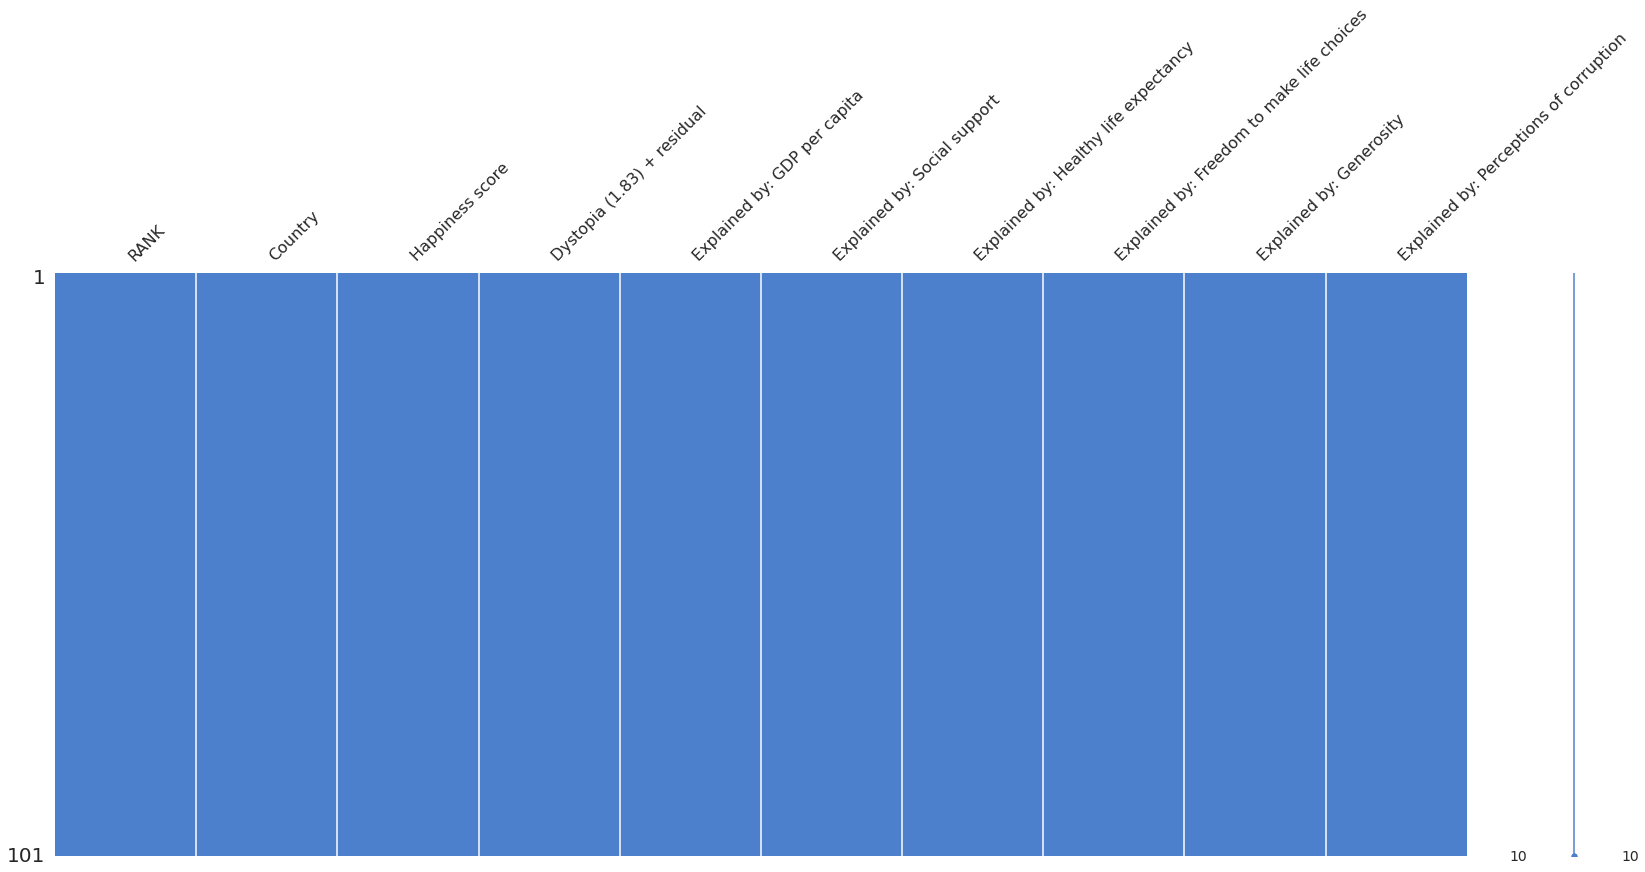

In [13]:
msno.matrix(df,color=(0.3, 0.5, 0.8))
plt.show()

In [14]:
# Let's inspect if there are any duplicate values 💣
data_info= pd.DataFrame()
data_info['Column Names']= df.columns
data_info['Datatype'] = df.dtypes.to_list()
data_info['Duplicate']= data_info['Column Names'].apply(lambda x: df[x].duplicated().sum())
data_info

#country는 하나도 안겹친다.

,Column Names,Datatype,Duplicate
0,RANK,int64,0
1,Country,object,0
2,Happiness score,float64,1
3,Dystopia (1.83) + residual,float64,4
4,Explained by: GDP per capita,float64,3
5,Explained by: Social support,float64,8
6,Explained by: Healthy life expectancy,float64,9
7,Explained by: Freedom to make life choices,float64,10
8,Explained by: Generosity,float64,19
9,Explained by: Perceptions of corruption,float64,14


In [15]:
df["Country"] = df["Country"].str.replace("*","")
# Now, data is clean 🐠

In [16]:
df["Country"].replace("Palestinian Territories","Palestine",inplace = True)
df["Country"].replace("Hong Kong S.A.R. of China","Hong Kong",inplace = True)
df["Country"].replace("Russia","Russian Federation",inplace = True)
df["Country"].replace("Taiwan Province of China","Taiwan",inplace = True)

In [17]:
# Adding a column with country codes 🧭

def countryCode (country_name):
    try:
        return pc.country_name_to_country_alpha2(country_name)
    except:
        return None                  # None keyword adds a null value 🐹

if __name__ == "__main__":
    df['Country code']= df.apply(lambda x: countryCode(x.Country), axis = 1)

In [18]:
# Adding a column with continent 🌡️
def continent(country_code):
    try:
        return pc.country_alpha2_to_continent_code(country_code)
    except:
        return None                  # None keyword adds a null value 🐹
    
if __name__ == "__main__":
    df['Continent']= df["Country code"].apply(lambda x: continent(x))

In [19]:
# Let's inspect the missing values 🐢
data_info= pd.DataFrame()
data_info['Column Names']= df.columns
data_info['Datatype'] = df.dtypes.to_list()
data_info['num_NA']= data_info['Column Names'].apply(lambda x: df[x].isna().sum())
data_info['%_NA']= data_info['Column Names'].apply(lambda x: df[x].isna().mean())
data_info

,Column Names,Datatype,num_NA,%_NA
0,RANK,int64,0,0.000000
1,Country,object,0,0.000000
2,Happiness score,float64,0,0.000000
3,Dystopia (1.83) + residual,float64,0,0.000000
4,Explained by: GDP per capita,float64,0,0.000000
5,Explained by: Social support,float64,0,0.000000
6,Explained by: Healthy life expectancy,float64,0,0.000000
7,Explained by: Freedom to make life choices,float64,0,0.000000
8,Explained by: Generosity,float64,0,0.000000
9,Explained by: Perceptions of corruption,float64,0,0.000000


In [20]:
df.dropna(inplace = True)

###평균값과 비교

In [21]:
per=round(df[df['Country']=="Egypt"]['Happiness score'].values[0]/np.mean(df['Happiness score'])*100,3)
if per<=100:
    print(f'평균보다 {100-per}%가량 낮습니다.')
elif per==100:
    print(f'정확하게 평균이군요!')
else:
    print(f'평균보다 {100-per}%가량 높습니다.')

평균보다 26.540999999999997%가량 낮습니다.


#EDA

데이터들의 왜도와 척도보기

In [22]:
#피처들의 Skewness (비대칭도) 확인
for col in [
 'Dystopia (1.83) + residual',
 'Explained by: GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption']:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[col].kurt())  
         )
    
#딱히 문제 있어보이는 컬럼은 없음

Dystopia (1.83) + residual Skewness: -0.74     Kurtosis: 000.60
Explained by: GDP per capita Skewness: -0.82     Kurtosis: 000.84
Explained by: Social support Skewness: -0.89     Kurtosis: 000.33
Explained by: Healthy life expectancy Skewness: -0.52     Kurtosis: -00.42
Explained by: Freedom to make life choices Skewness: -0.74     Kurtosis: 000.15
Explained by: Generosity Skewness: 01.03     Kurtosis: 001.82
Explained by: Perceptions of corruption Skewness: 01.31     Kurtosis: 001.05


Skewness: -0.230497
Kurtosis: -0.379362


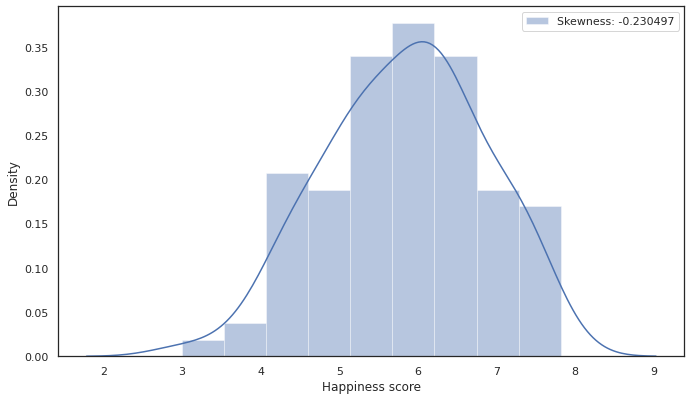

In [23]:
#label의 Skewness (비대칭도) 확인
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(df["Happiness score"], color = "b", label="Skewness: {:2f}".format(df["Happiness score"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % df["Happiness score"].skew())
print("Kurtosis: %f" % df["Happiness score"].kurt())

# Target Feature인 Happiness score의 비대칭도와 첨도를 확인합니다. 
# 그래프와 수치를 확인하면 정상적으로 분포되지 않는것을 확인할 수 있습니다. 
# 예측의 정확도를 높히기 위해 로그 변환을 수행합니다.
#왜도는 절댓값을 2를 안넘고 첨도는 절댓값을 7을 안넘으면 기준에 부합한다고 할 수 있다.
#첨도가 너무 크면 이상치가 많다고 할 수 있다.

#딱히 문제있어보이지 않는다 그냥 이대로 쓸것임

#데이터 파이프라인

In [24]:
targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
def pipe(df):
  df['target'] = pd.qcut(df[df.columns[2]],len(targets),labels=targets)
  g_d=df.set_index('Country') #어차피 1행씩 밖에 없으므로 그냥 index를 country로 바꿔주기만한것
  return g_d

In [25]:
df_t = pipe(df)
df_t

,RANK,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Country code,Continent,target
Country,,,,,,,,,,,,
Finland,1,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,FI,EU,Top
Denmark,2,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532,DK,EU,Top
Iceland,3,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191,IS,EU,Top
Switzerland,4,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461,CH,EU,Top
Netherlands,5,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419,NL,EU,Top
...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,97,4.197,1.561,0.691,1.043,0.384,0.330,0.090,0.098,YE,AS,Low
Jordan,98,4.152,0.695,1.324,0.724,0.675,0.476,0.058,0.200,JO,AS,Low
India,99,3.777,0.795,1.167,0.376,0.471,0.647,0.198,0.123,IN,AS,Low


###스피어만 상관계수
 데이터에 순위만 매길 수 있다면 적용이 가능하므로 연속형Continuous 데이터에 적합한 피어슨 상관 계수와 달리 이산형Discrete 데이터, 순서형Ordinal 데이터에 적용이 가능하다. 

In [26]:
spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix

,RANK,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
RANK,1.000000,-0.999997,-0.533062,-0.844325,-0.823983,-0.745145,-0.588446,-0.000489,-0.416138
Happiness score,-0.999997,1.000000,0.533264,0.844334,0.823813,0.745129,0.588348,0.000767,0.415929
Dystopia (1.83) + residual,-0.533062,0.533264,1.000000,0.141245,0.249077,0.126022,0.149957,-0.029823,0.034508
Explained by: GDP per capita,-0.844325,0.844334,0.141245,1.000000,0.740569,0.848508,0.410034,-0.100363,0.451949
Explained by: Social support,-0.823983,0.823813,0.249077,0.740569,1.000000,0.652683,0.437632,0.027047,0.260691
Explained by: Healthy life expectancy,-0.745145,0.745129,0.126022,0.848508,0.652683,1.000000,0.327293,-0.179174,0.379120
Explained by: Freedom to make life choices,-0.588446,0.588348,0.149957,0.410034,0.437632,0.327293,1.000000,0.155192,0.403780
Explained by: Generosity,-0.000489,0.000767,-0.029823,-0.100363,0.027047,-0.179174,0.155192,1.000000,0.119052
Explained by: Perceptions of corruption,-0.416138,0.415929,0.034508,0.451949,0.260691,0.379120,0.403780,0.119052,1.000000


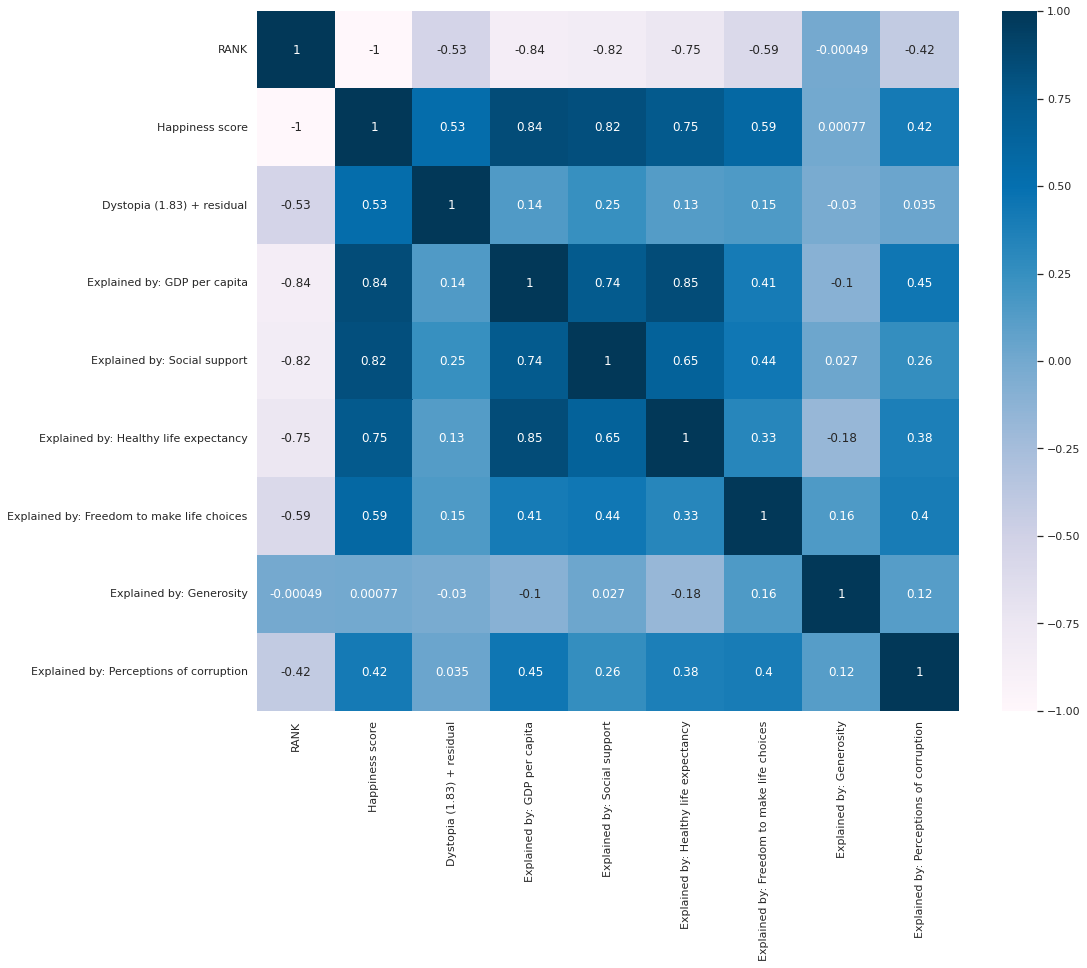

In [27]:
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(spearman_cormatrix,vmin=-1, vmax=1,center=0, cmap=plt.cm.PuBu, annot=True)

(GDP , Social Support, life expectancy , Freedom)가 happiniess score와 연관이 깊다.

다중공선성이 보이는 것들은 (GDP, life expectancy) / (GDP , social support)이다.

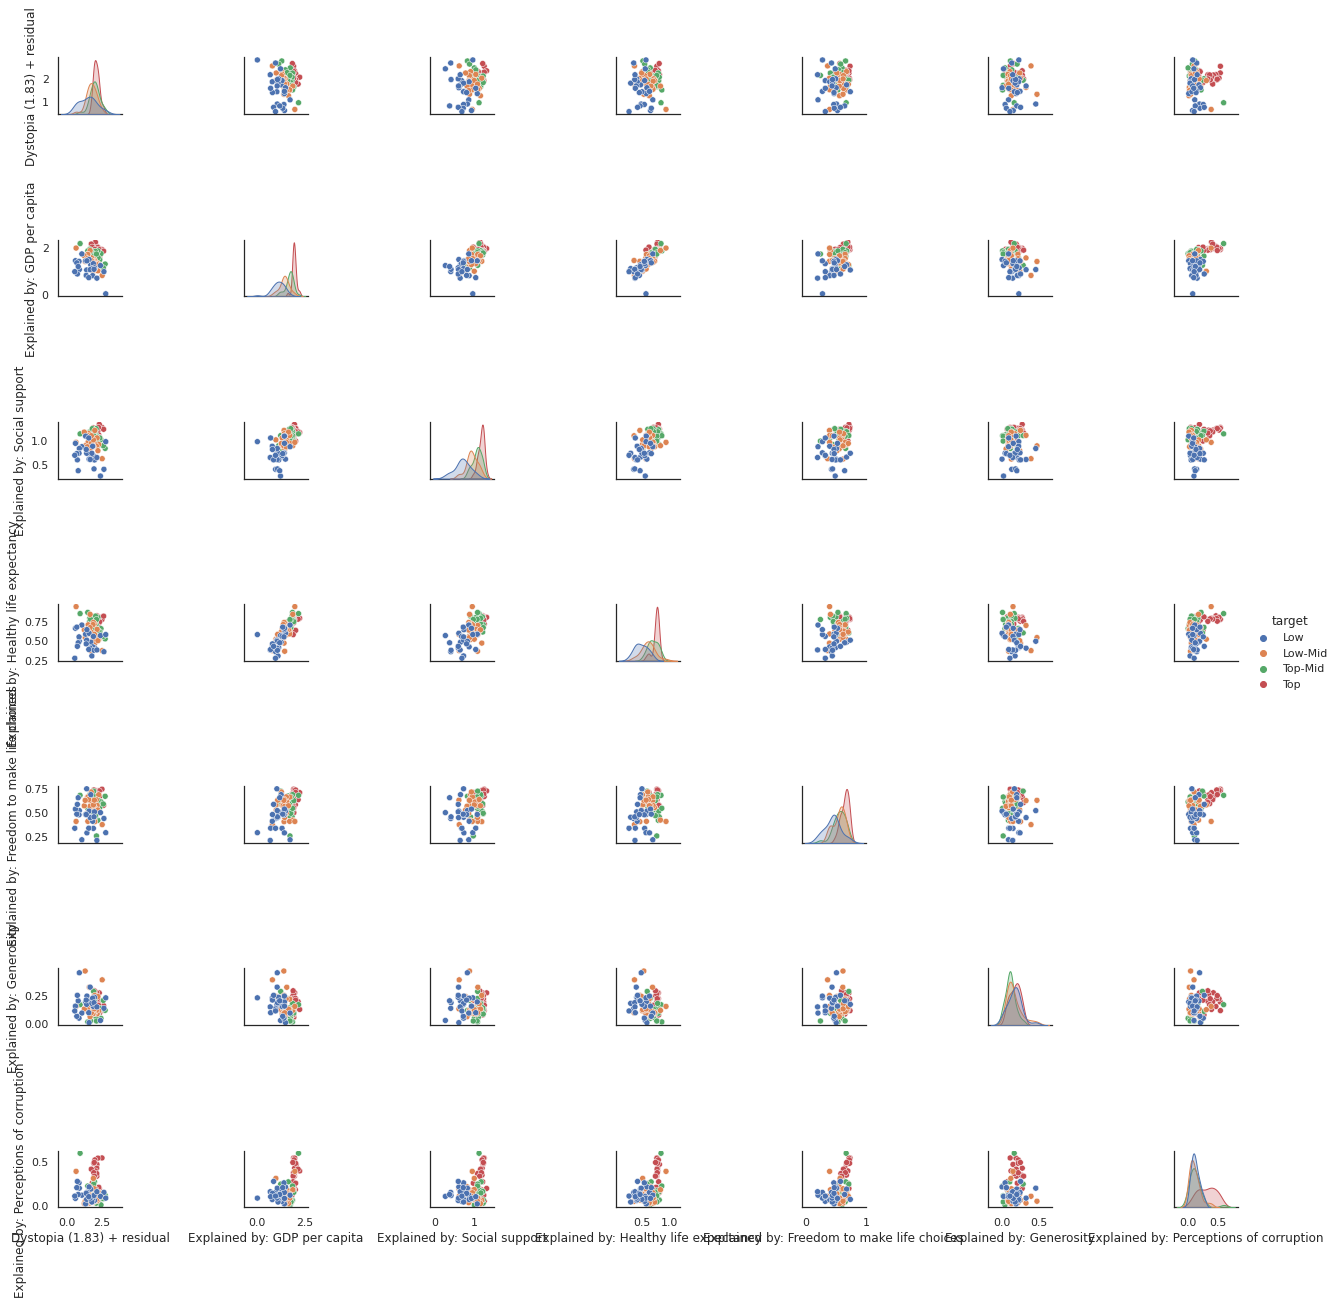

In [28]:
sns.pairplot(df_t[[
 'Dystopia (1.83) + residual',
 'Explained by: GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption','target']], hue='target')

각 속성별로 TOP 10 국가들

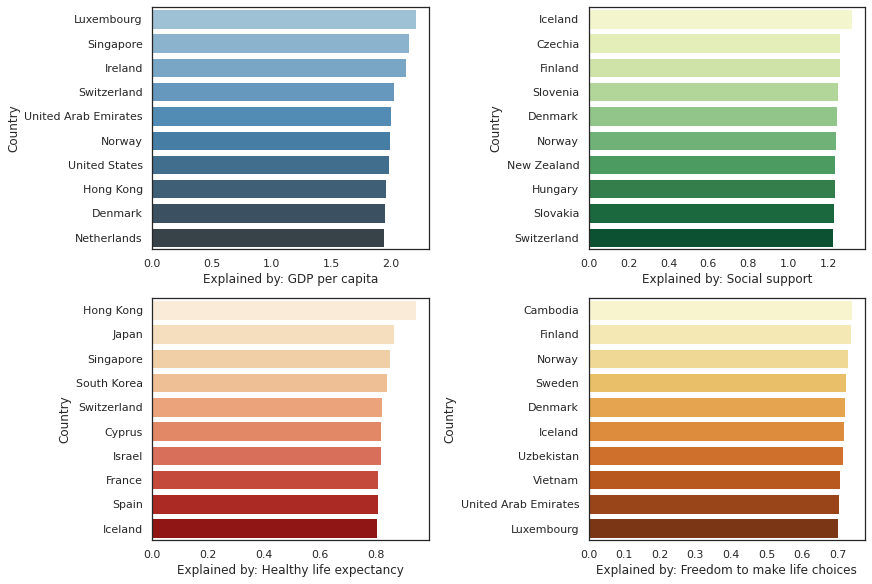

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Explained by: GDP per capita',y='Country',data=df.nlargest(10,'Explained by: GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Explained by: Social support' ,y='Country',data=df.nlargest(10,'Explained by: Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Explained by: Healthy life expectancy' ,y='Country',data=df.nlargest(10,'Explained by: Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Explained by: Freedom to make life choices' ,y='Country',data=df.nlargest(10,'Explained by: Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

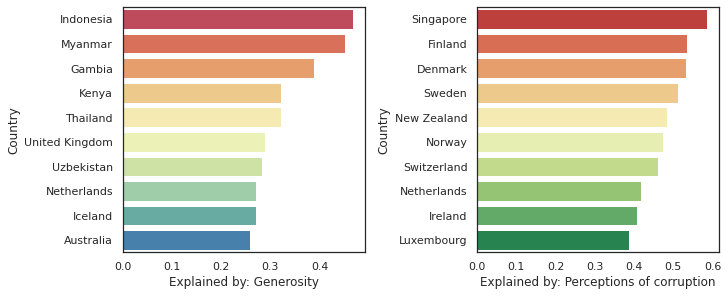

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Explained by: Generosity' ,y='Country',data=df.nlargest(10,'Explained by: Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Explained by: Perceptions of corruption' ,y='Country',data=df.nlargest(10,'Explained by: Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

In [31]:
# Data copy 🧲
sample = df.copy()
# Create a column with standard names of countries 🍄
sample["StNames"] = sample["Country"].apply(lambda x : pc.country_name_to_country_alpha3(x))

In [32]:
sample.rename(columns={'Happiness score':'happinessScore','Dystopia (1.83) + residual':'dystopia','Explained by: GDP per capita':'gdp','Explained by: Social support':'socialSupport',
                   'Explained by: Healthy life expectancy':'health','Explained by: Freedom to make life choices':'freedom','Explained by: Generosity':'generosity',
                   'Explained by: Perceptions of corruption':'corruptionPerceptions','Country':'country','Continent':'continent'},inplace=True)

In [33]:
sample.columns

Index(['RANK', 'country', 'happinessScore', 'dystopia', 'gdp', 'socialSupport',
       'health', 'freedom', 'generosity', 'corruptionPerceptions',
       'Country code', 'continent', 'target', 'StNames'],
      dtype='object')

In [34]:
sample['continent'].unique()

array(['EU', 'AS', 'OC', 'NA', 'SA', 'AF'], dtype=object)

In [35]:
sample['continent']=sample['continent'].replace('EU','Europe')
sample['continent']=sample['continent'].replace('AS','Asia')
sample['continent']=sample['continent'].replace('OC','Oceania')
sample['continent']=sample['continent'].replace('NA','North America')
sample['continent']=sample['continent'].replace('AF','Africa')
sample['continent']

0      Europe
1      Europe
2      Europe
3      Europe
4      Europe
        ...  
96       Asia
97       Asia
98       Asia
99     Africa
100    Africa
Name: continent, Length: 99, dtype: object

전처리 한것을 내보내주기

In [36]:
sample.to_csv("happy_data2.csv",index=False)

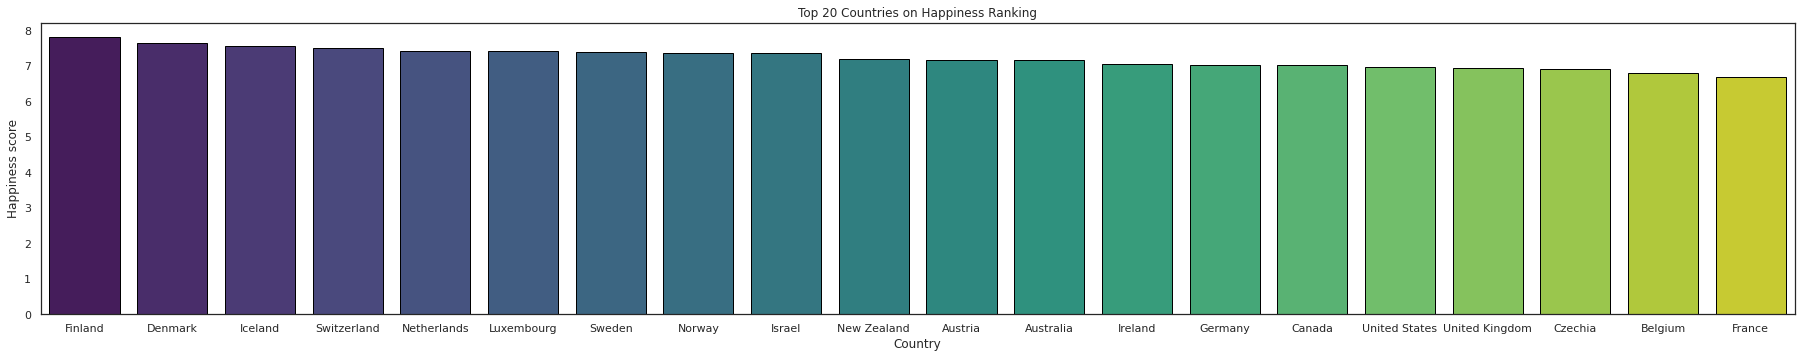

In [37]:
# World Map for Happiness Ranking 🦞
fig = px.choropleth(sample, locations = "StNames", color = "RANK",
                    scope = 'world', title = "Happiness Ranking World Map", color_continuous_scale= "viridis")

# A data frame with top 20 values 🌐
data = df.head(20)

# Barplot for top 20 countries Happiness Index
plt.figure(figsize=(28,5))
plt.title("Top 20 Countries on Happiness Ranking")
sns.barplot(x = data["Country"], y = data["Happiness score"], data = data, palette='viridis', edgecolor='black')


fig.show()
plt.show()

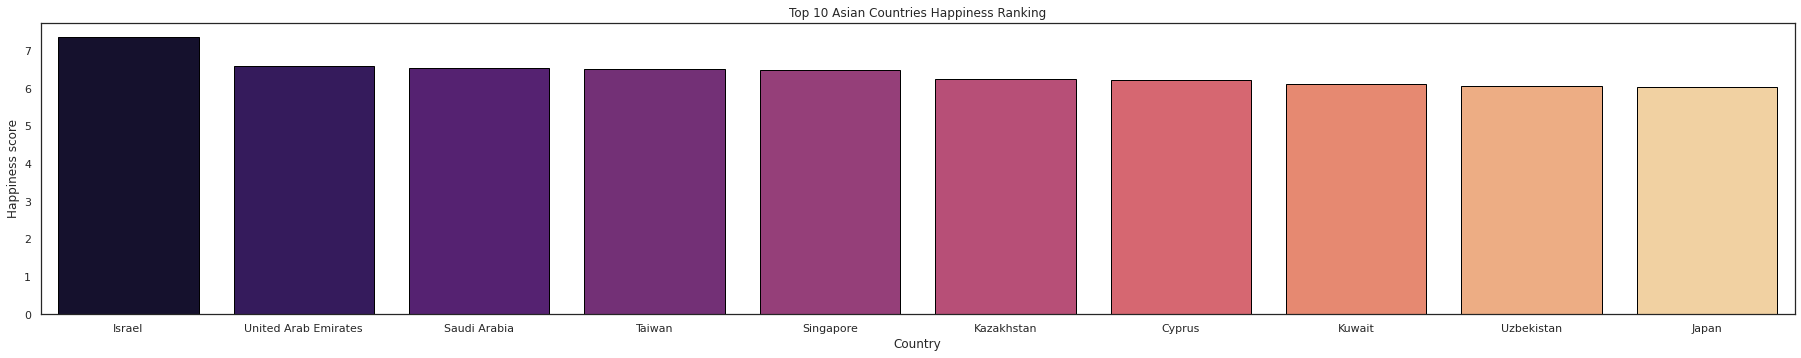

In [38]:
# Asia Map for Happiness Ranking 🦂 
fig = px.choropleth(sample, locations = "StNames", color = "RANK",
                    scope = 'asia', title = "Asia Happiness Ranking Map", color_continuous_scale= "magma")

# Barplot for top 10 Asian countries on Happiness Index
data = df[df["Continent"] == "AS"].head(10)

plt.figure(figsize=(28,5))
plt.title("Top 10 Asian Countries Happiness Ranking")
sns.barplot(x = data["Country"], y = data["Happiness score"], data = data, palette='magma', edgecolor='black')

fig.show()
plt.show()

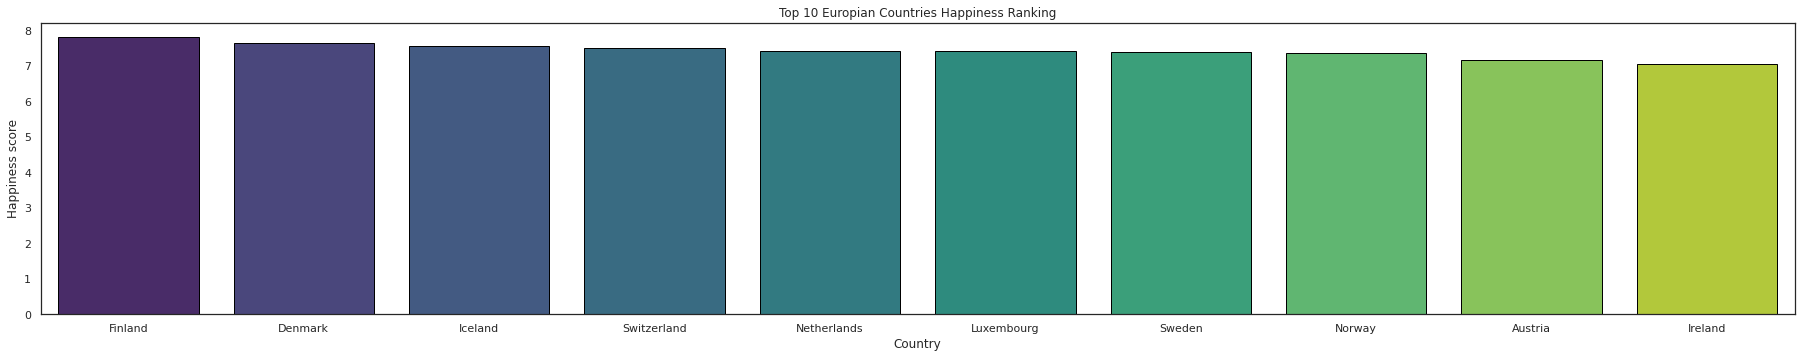

In [39]:
# Europian Map for Happiness Ranking 🦂 
fig = px.choropleth(sample, locations = "StNames", color = "RANK",
                    scope = 'europe', title = "Europian Happiness Ranking Map", color_continuous_scale= "viridis")

# Barplot for top 10 Europian countries on Happiness Index
data = df[df["Continent"] == "EU"].head(10)

plt.figure(figsize=(28,5))
plt.title("Top 10 Europian Countries Happiness Ranking")
sns.barplot(x = data["Country"], y = data["Happiness score"], data = data, palette='viridis', edgecolor='black')

fig.show()
plt.show()

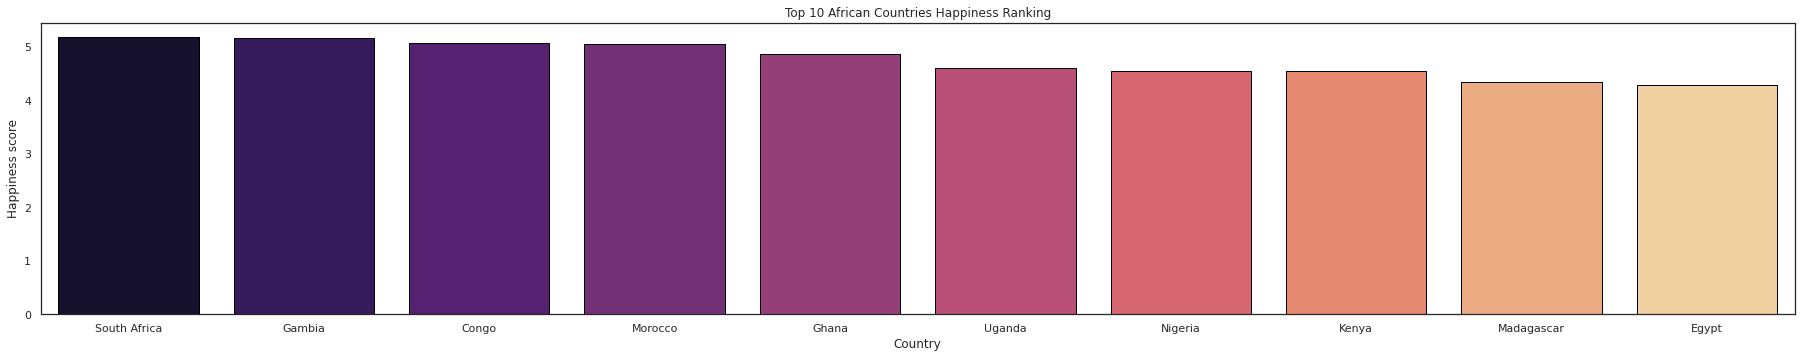

In [40]:
# Africa Map for Happiness Ranking 🦂 
fig = px.choropleth(sample, locations = "StNames", color = "RANK",
                    scope = 'africa', title = "African Happiness Ranking Map", color_continuous_scale= "magma")


# Barplot for top 10 Europian countries on Happiness Index
data = df[df["Continent"] == "AF"].head(10)

plt.figure(figsize=(28,5))
plt.title("Top 10 African Countries Happiness Ranking")
sns.barplot(x = data["Country"], y = data["Happiness score"], data = data, palette='magma', edgecolor='black')

fig.show()
plt.show()

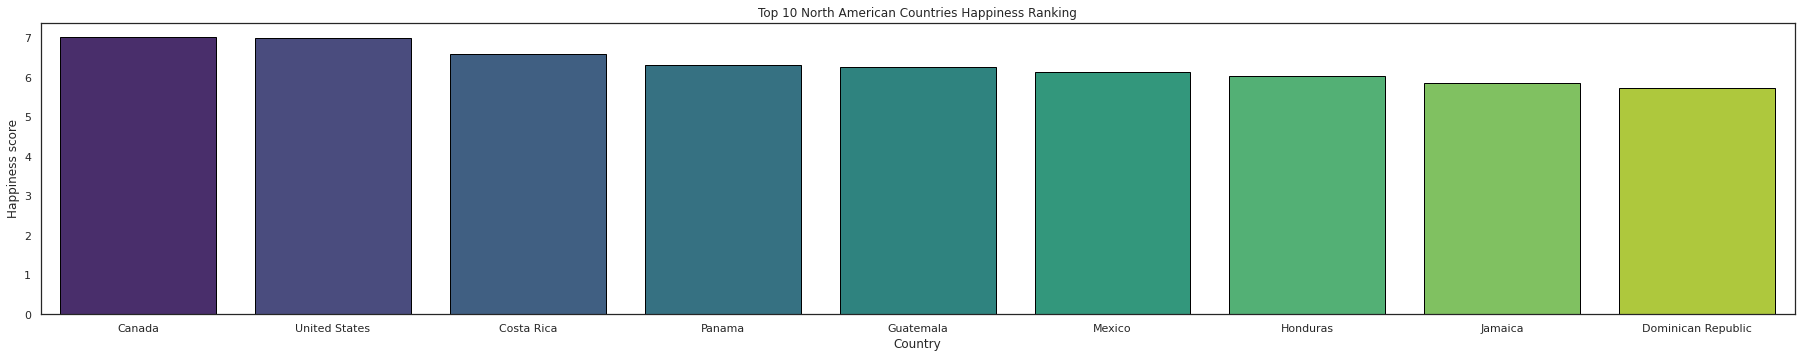

In [41]:
# North American Map for Happiness Ranking 🦂 
fig = px.choropleth(sample, locations = "StNames", color = "RANK",
                    scope = 'north america', title = "North American Happiness Ranking Map", color_continuous_scale= "viridis")


# Barplot for top 10 Europian countries on Happiness Index
data = df[df["Continent"] == "NA"].head(10)

plt.figure(figsize=(28,5))
plt.title("Top 10 North American Countries Happiness Ranking")
sns.barplot(x = data["Country"], y = data["Happiness score"], data = data, palette='viridis', edgecolor='black')

fig.show()
plt.show()

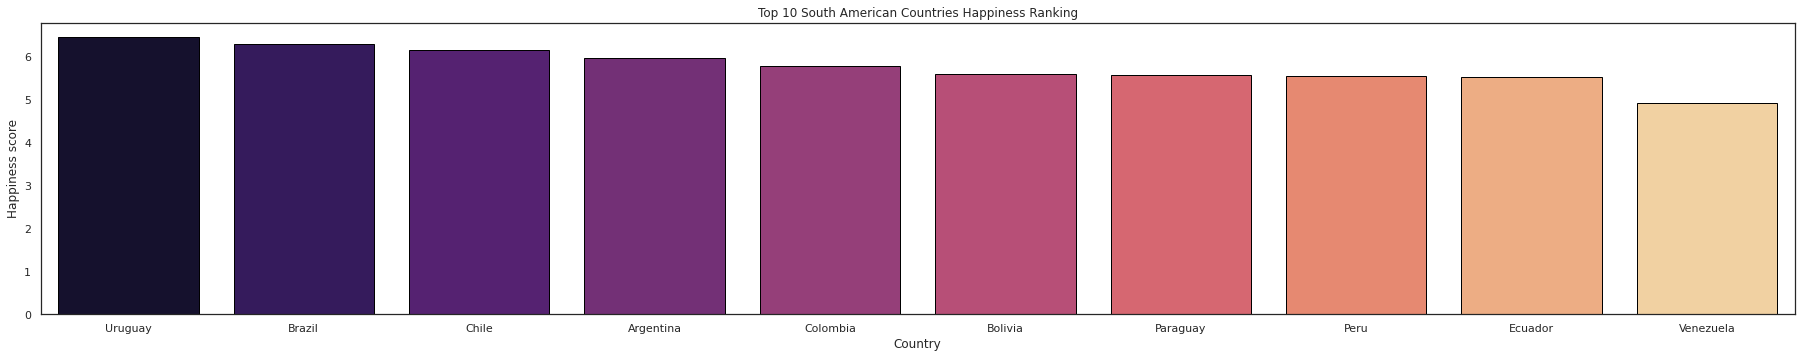

In [42]:
# South American Map for Happiness Ranking 🦂 
fig = px.choropleth(sample, locations = "StNames", color = "RANK",
                    scope = 'south america', title = "South American Happiness Ranking Map", color_continuous_scale= "magma")


# Barplot for top 10 Europian countries on Happiness Index
data = df[df["Continent"] == "SA"].head(10)

plt.figure(figsize=(28,5))
plt.title("Top 10 South American Countries Happiness Ranking")
sns.barplot(x = data["Country"], y = data["Happiness score"], data = data, palette='magma', edgecolor='black')

fig.show()
plt.show()

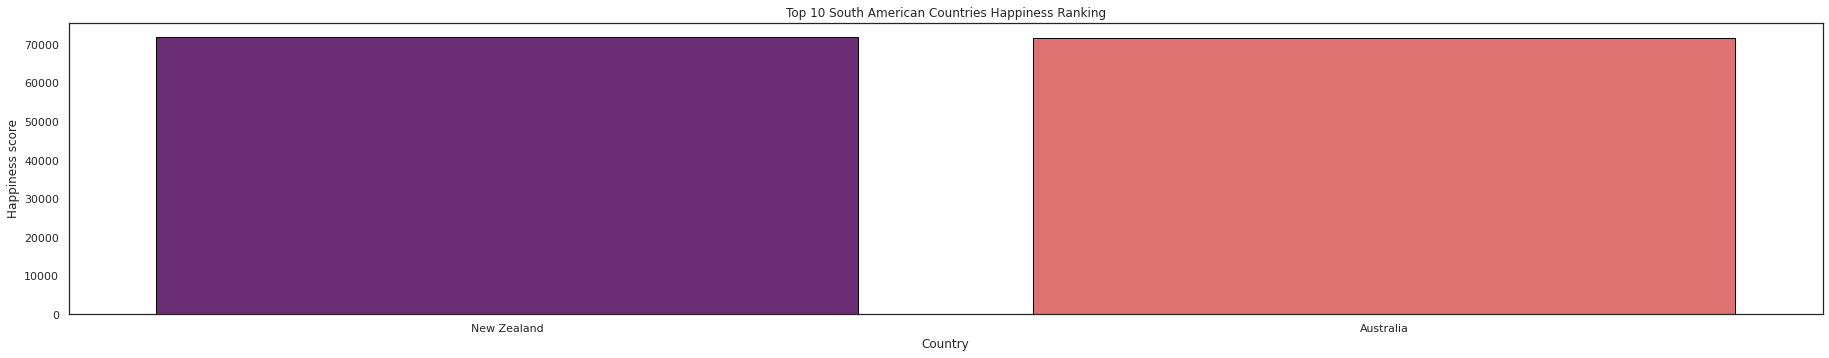

In [43]:
data = df[df["Continent"] == "OC"].head(10)

plt.figure(figsize=(28,5))
plt.title("Top 10 South American Countries Happiness Ranking")
sns.barplot(x = data["Country"], y = data["Happiness score"]*10000, data = data, palette='magma', edgecolor='black')

plt.show()

## 대륙별로 grouping하기

In [44]:
# Grouping data on basis of continents 🐾
contData = df.groupby("Continent")

In [45]:
# Average Happiness Score per Continent 🦨
happAvg = contData["Happiness score"].mean()
pd.DataFrame(happAvg)

,Happiness score
Continent,
AF,4.509846
AS,5.459629
EU,6.634633
NA,6.321333
OC,7.181000
SA,5.788200


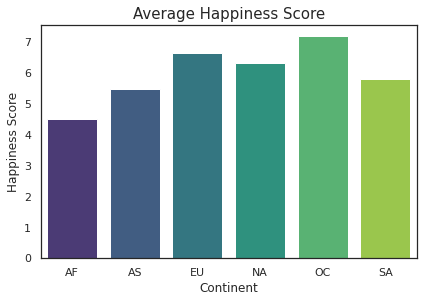

In [46]:
plt.title("Average Happiness Score", fontdict={'fontsize':15})
plt.ylabel("Happiness Score")
sns.barplot(x = happAvg.index, y = happAvg.values, palette = "viridis")
plt.show()

####겉보기에 대륙별로 차이가 난다.과연 대륙이 행복도에 영향을 줄까?

####H0 : 대륙별로 행복도 차이가 나지 않는다.
####H1 : 대륙별로 행복도 차이가 난다.

In [47]:
sample.columns

Index(['RANK', 'country', 'happinessScore', 'dystopia', 'gdp', 'socialSupport',
       'health', 'freedom', 'generosity', 'corruptionPerceptions',
       'Country code', 'continent', 'target', 'StNames'],
      dtype='object')

In [48]:
import pingouin as pg
aov = pg.anova(data=sample, dv='happinessScore', between='country', detailed=False)
aov
#아주 유의한 차이를 주는 것을 알 수 있다.

,Source,ddof1,ddof2,np2
0,country,98,0,1.0


In [49]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


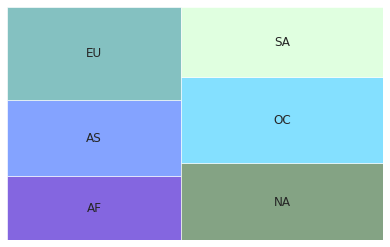

In [50]:
import squarify # pip install squarify
sizes=happAvg.values
label=happAvg.index
color=['#3300CC','#3366FF','#339999','#336633','#33CCFF','#CCFFCC']
squarify.plot(sizes=sizes,label=label,alpha=0.6,color=color)
plt.axis('off')
plt.show()

##한 나라 집중적으로 시각화하기

In [51]:
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Country code', 'Continent', 'target'],
      dtype='object')

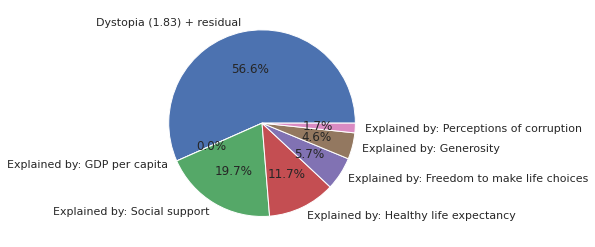

In [52]:
labels=df[df['Country code']=='VE'][['Dystopia (1.83) + residual','Explained by: GDP per capita','Explained by: Social support', 'Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption']].columns
frequency=df[df['Country code']=='VE'][['Dystopia (1.83) + residual','Explained by: GDP per capita','Explained by: Social support', 'Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption']]
plt.pie(frequency, labels=labels, autopct='%.1f%%')
plt.show()

---------------------------------------

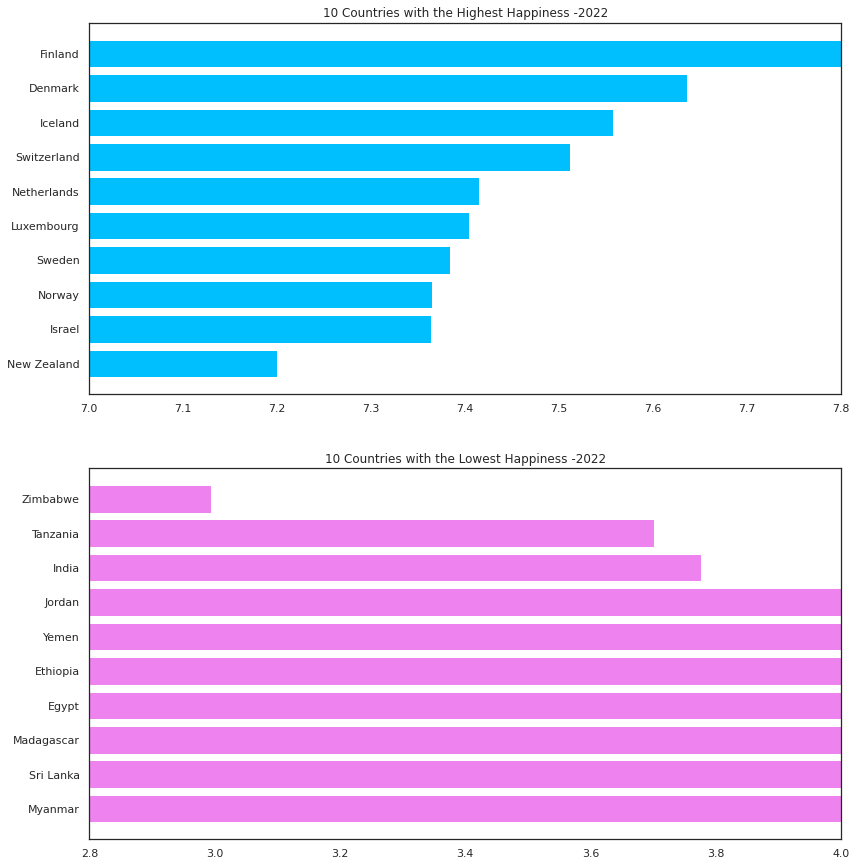

In [53]:
plt.subplots(2,1,figsize=(12,14))
plt.subplot(211)
x = df.sort_values('Happiness score', ascending=True).tail(10)
plt.barh(y='Country', width='Happiness score', data=x, color='deepskyblue')
plt.xlim(xmin=7.0, xmax=7.8)
plt.title('10 Countries with the Highest Happiness -2022')
plt.subplot(212)
x = df.sort_values('Happiness score', ascending=False).tail(10)
plt.barh(y='Country', width='Happiness score', data=x, color='violet')
plt.xlim(xmin=2.8, xmax=4.0)
plt.title('10 Countries with the Lowest Happiness -2022')
plt.show()

#HIERARCHICAL CLUSTERING 

그러나 계층적 군집을 적용하기 전에 각 변수의 크기가 동일하도록 데이터를 정규화해야 합니다. 왜 이것이 중요할까요? 변수의 크기가 같지 않으면 모형이 더 큰 크기의 변수에 치우칠 수 있습니다.

In [54]:
nums=['Happiness score','Dystopia (1.83) + residual','Explained by: GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption']
from sklearn.preprocessing import normalize
data_scaled = normalize(df[nums])
data_scaled = pd.DataFrame(data_scaled, columns=nums)
datasc=data_scaled.copy()
data_scaled.head()

,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,0.908498,0.292494,0.219777,0.146131,0.090025,0.085495,0.012662,0.062030
1,0.912273,0.265940,0.233325,0.148501,0.092828,0.085899,0.022460,0.063558
2,0.908107,0.278789,0.232644,0.158621,0.096495,0.086280,0.032445,0.022952
3,0.910686,0.261010,0.245614,0.148629,0.099652,0.082073,0.017821,0.055887
4,0.912180,0.262890,0.239270,0.148360,0.096815,0.080085,0.033338,0.051545


In [55]:
df.drop(columns=nums, inplace=True)

덴드로그램을 그려보자

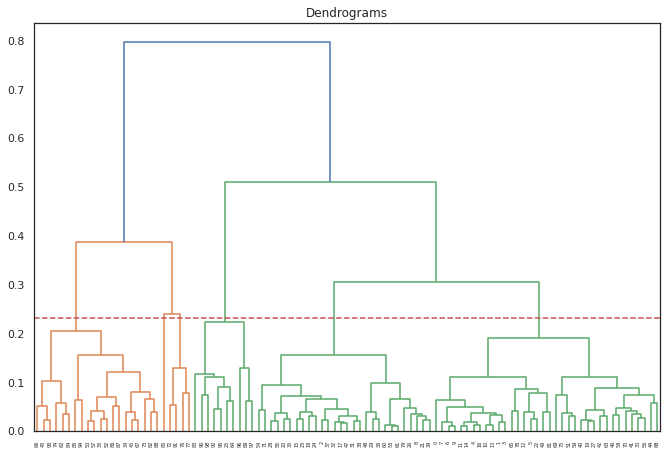

In [56]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.23, color='r', linestyle='--')


In [57]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=18, affinity='euclidean', linkage='ward')  
data_scaled['group']=list(cluster.fit_predict(data_scaled))

In [58]:
data_scaled.groupby('group').size()

group
0      6
1     17
2     11
3     13
4      4
5      2
6      6
7      7
8      2
9      2
10     2
11     1
12     1
13     6
14     1
15     4
16    12
17     2
dtype: int64

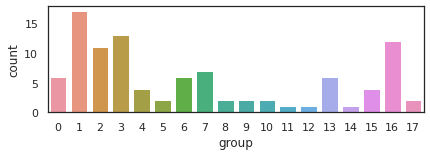

In [59]:
#각 그룹별 빈도
plt.subplot(211)
sns.countplot(data = data_scaled ,x='group')
plt.show()

군집별로 grouping하기

In [60]:
# Grouping data on basis of groups 🐾
contData = data_scaled.groupby("group")

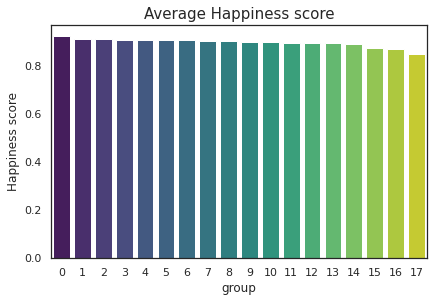

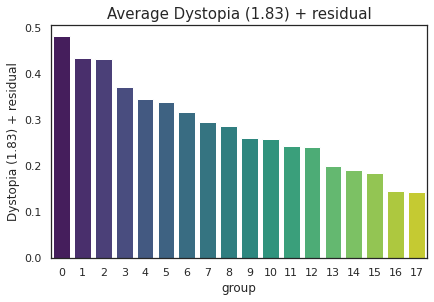

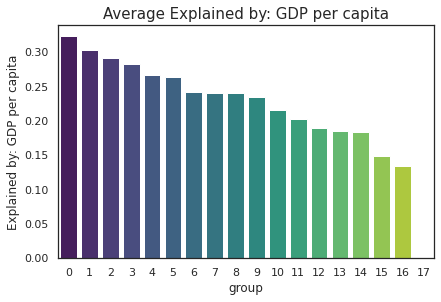

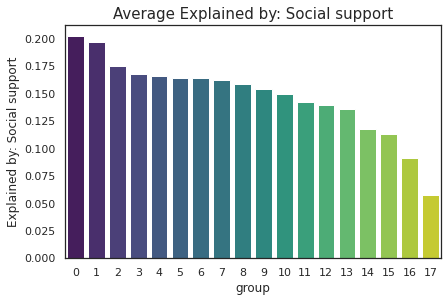

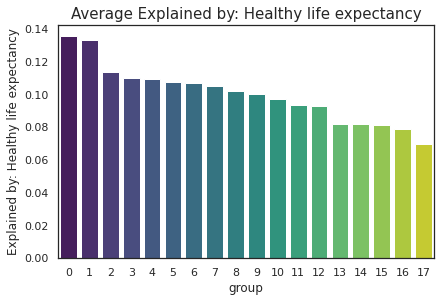

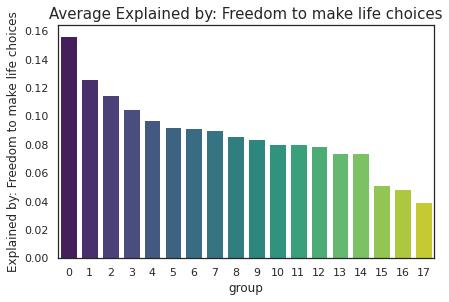

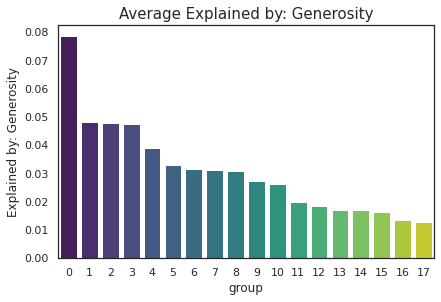

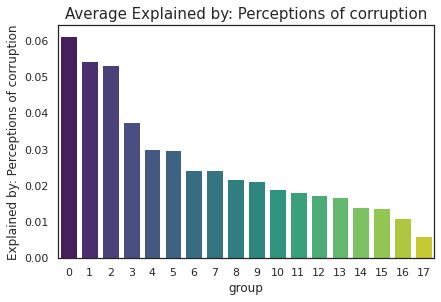

In [61]:
col=['Happiness score','Dystopia (1.83) + residual','Explained by: GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption']
for i in col:
  plt.title(f'Average {i}', fontdict={'fontsize':15})
  plt.ylabel(f'{i}')
  sns.barplot(x = contData[i].mean().index, y = sorted(contData[i].mean(i).values,reverse=True), palette = "viridis")
  plt.show()

In [62]:
df=pd.concat([data_scaled, df],axis=1)

In [63]:
for j in range(0,18):
  print(f'what is group {j} include?')
  print(df[df['group']==j]['Country'].values)
  print("="*30)

what is group 0 include?
['Uzbekistan' 'Vietnam' 'Armenia' 'Bangladesh' 'Turkey' 'Madagascar']
what is group 1 include?
['Iceland' 'United States' 'Czechia' 'Belgium' 'Slovenia' 'Saudi Arabia'
 'Taiwan' 'Uruguay' 'Slovakia' 'Panama' 'Kazakhstan' 'Serbia' 'Chile'
 'Argentina' 'Mongolia' 'Dominican Republic' 'North Macedonia']
what is group 2 include?
['Israel' 'Costa Rica' 'Romania' 'Italy' 'Cyprus' 'Mexico' 'Greece'
 'Colombia' 'Peru' 'Ecuador' 'Georgia']
what is group 3 include?
['France' 'Spain' 'Malta' 'Poland' 'Kuwait' 'Hungary' 'Japan' 'Portugal'
 'Malaysia' 'China' nan 'Nepal' 'Indonesia']
what is group 4 include?
['Singapore' 'Russian Federation' 'Sri Lanka' 'Ethiopia']
what is group 5 include?
['South Africa' 'Myanmar']
what is group 6 include?
['Guatemala' 'Honduras' 'Tajikistan' 'Gambia' 'Iran' 'Kenya']
what is group 7 include?
['Luxembourg' 'Ireland' 'United Arab Emirates' 'South Korea' 'Hong Kong'
 'Morocco' 'Venezuela']
what is group 8 include?
['Ukraine' 'Congo']
what is 

https://brunch.co.kr/@wikiviki/325

의미없는 결과....

#년도별 데이터셋을 추가해서 년도별로 어떻게 변하나 보기

In [64]:
war=pd.read_csv('/content/drive/Shareddrives/elice/war.csv')
war
df2015 = pd.read_csv('/content/drive/Shareddrives/elice/2015.csv')
df2016 = pd.read_csv('/content/drive/Shareddrives/elice/2016.csv')
df2017 = pd.read_csv('/content/drive/Shareddrives/elice/2017.csv')
df2018 = pd.read_csv('/content/drive/Shareddrives/elice/2018.csv')
df2019 = pd.read_csv('/content/drive/Shareddrives/elice/2019.csv')
df2020 = pd.read_csv('/content/drive/Shareddrives/elice/2020.csv')
df2021 = pd.read_csv('/content/drive/Shareddrives/elice/2021.csv')
df2022 = pd.read_csv('/content/drive/Shareddrives/elice/2022_google_csv.csv')

In [65]:
#Add year column
yrs = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
dfs = [df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022]
for i in range(0,8):
    dfs[i]['Year'] = yrs[i]

In [66]:
common_cols = ['Happiness Rank', 'Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family (Social Support)','Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)','Generosity','Year']

In [67]:
df2015 = df2015.rename(columns={'Family':'Family (Social Support)'})
df2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [68]:
df2016 = df2016.rename(columns={'Family':'Family (Social Support)'})

In [69]:
df2017 = df2017.rename(columns={'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Family':'Family (Social Support)','Health..Life.Expectancy.':'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)'})

In [70]:
df2017 = df2017.merge(df2015[["Country","Region"]], on="Country", how="left")
df2017["Region"] = df2017["Region"].fillna('-')
df2017.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia.Residual,Year,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,Western Europe


In [71]:
df2018 = df2018.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)','Social support':'Family (Social Support)','Healthy life expectancy':'Health (Life Expectancy)','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust (Government Corruption)'})

In [72]:
df2018 = df2018.merge(df2015[["Country","Region"]], on="Country", how="left")
df2018["Region"] = df2018["Region"].fillna('-')
df2018.tail(2)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018,Sub-Saharan Africa
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076,2018,Sub-Saharan Africa


In [73]:
df2019 = df2019.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score', 'GDP per capita':'Economy (GDP per Capita)','Social support':'Family (Social Support)','Healthy life expectancy':'Health (Life Expectancy)','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust (Government Corruption)'})

In [74]:
df2019 = df2019.merge(df2015[["Country","Region"]], on="Country", how="left")
df2019["Region"] = df2019["Region"].fillna('-')
df2019.head(2)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe


In [75]:
df2020 = df2020.rename(columns={'Country name':'Country','Regional indicator': 'Region','Ladder score':'Happiness Score','Explained by: Social support':'Family (Social Support)','Explained by: Healthy life expectancy':'Health (Life Expectancy)','Explained by: Freedom to make life choices':'Freedom','Explained by: Perceptions of corruption':'Trust (Government Corruption)','Explained by: Log GDP per capita':'Economy (GDP per Capita)','Explained by: Generosity':'Generosity'})

In [76]:
df2020['Happiness Rank'] = [i for i in range(1, len(df2020.index)+1)]

In [77]:
df2020 = df2020.loc[:,~df2020.columns.duplicated(keep='last')]
df2020.head(2)

,Country,Region,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia + residual,Year,Happiness Rank
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,2020,1
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2020,2


In [78]:
df2021 = df2021.rename(columns={'Country name':'Country','Regional indicator': 'Region','Ladder score':'Happiness Score','Explained by: Social support':'Family (Social Support)','Explained by: Healthy life expectancy':'Health (Life Expectancy)','Explained by: Freedom to make life choices':'Freedom','Explained by: Perceptions of corruption':'Trust (Government Corruption)','Explained by: Log GDP per capita':'Economy (GDP per Capita)','Explained by: Generosity':'Generosity'})

In [79]:
df2021 = df2021.loc[:,~df2021.columns.duplicated(keep='last')]
df2021['Happiness Rank'] = [i for i in range(1, len(df2021.index)+1)]
df2021.head(2)

,Country,Region,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia + residual,Year,Happiness Rank
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2021,1
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2021,2


In [80]:
df2022 = df2022.merge(df2015[["Country","Region"]], on="Country", how="right")
df2022["Region"] = df2022["Region"].fillna('-')
df2022.head()

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Year,Region
0,4.0,Switzerland,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461,NaN,NaN,NaN,NaN,2022,Western Europe
1,3.0,Iceland,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191,NaN,NaN,NaN,NaN,2022,Western Europe
2,2.0,Denmark,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532,NaN,NaN,NaN,NaN,2022,Western Europe
3,8.0,Norway,7.365,1.925,1.997,1.239,0.786,0.728,0.217,0.474,NaN,NaN,NaN,NaN,2022,Western Europe
4,15.0,Canada,7.025,1.924,1.886,1.188,0.783,0.659,0.217,0.368,NaN,NaN,NaN,NaN,2022,North America


In [81]:
df2022 = df2022.rename(columns={'RANK':'Happiness Rank','Happiness score':'Happiness Score','Explained by: GDP per capita':'Economy (GDP per Capita)', 'Explained by: Social support':'Family (Social Support)','Explained by: Healthy life expectancy':'Health (Life Expectancy)','Explained by: Freedom to make life choices':'Freedom','Explained by: Generosity':'Generosity', 'Explained by: Perceptions of corruption':'Trust (Government Corruption)'})
df2022.head(2)

,Happiness Rank,Country,Happiness Score,Dystopia (1.83) + residual,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Year,Region
0,4.0,Switzerland,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461,NaN,NaN,NaN,NaN,2022,Western Europe
1,3.0,Iceland,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191,NaN,NaN,NaN,NaN,2022,Western Europe


In [82]:
dfs = [df2015[common_cols], df2016[common_cols], df2017[common_cols], df2018[common_cols], df2019[common_cols], df2020[common_cols], df2021[common_cols], df2022[common_cols]]

In [83]:
df_merged = pd.DataFrame(columns=common_cols)

In [84]:
df_merged = df_merged.append(dfs)

In [85]:
df_merged.shape

(1242, 11)

In [86]:
df_merged.dropna(axis='rows',inplace=True)

In [87]:
df_merged.shape

(1173, 11)

In [88]:
df_merged["Country"].replace("Palestinian Territories","Palestine",inplace = True)
df_merged["Country"].replace("Hong Kong S.A.R. of China","Hong Kong",inplace = True)
df_merged["Country"].replace("Russia","Russian Federation",inplace = True)
df_merged["Country"].replace("Taiwan Province of China","Taiwan",inplace = True)
df_merged["Country"].replace("Congo (Brazzaville)","Congo",inplace = True)
df_merged["Country"].replace("Congo (Kinshasa)","Congo",inplace = True)
df_merged["Country"].replace("Hong Kong S.A.R., China","Hong Kong",inplace = True)

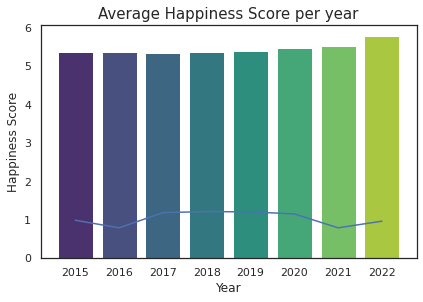

In [89]:
yearAvg=df_merged.groupby('Year')[['Happiness Score','Family (Social Support)','Economy (GDP per Capita)','Health (Life Expectancy)']].mean()
plt.title("Average Happiness Score per year", fontdict={'fontsize':15})
plt.ylabel("Happiness Score")
sns.barplot(x = yearAvg.index, y = yearAvg['Happiness Score'].values, palette = "viridis")
sns.lineplot(x=yearAvg.index, y=yearAvg['Family (Social Support)'].values)
plt.show()

####겉보기에 년도별로 차이가 나지 않아보인다.과연 년도가 행복도에 영향을 줄까?

####H0 : 년도별로 행복도 차이가 나지 않는다.
####H1 : 년도별로 행복도 차이가 난다.

In [90]:
import pingouin as pg
aov = pg.anova(data=df_merged, dv='Happiness Score', between='Year', detailed=False)
aov
#p-value > a 이므로 귀무가설 채택할 만한 충분한 근거가 있음. 따라서 차이가 나지 않는다고 할 수 있다.

,Source,ddof1,ddof2,F,p-unc,np2
0,Year,7,1165,1.766634,0.090287,0.010503


In [91]:
korea=df_merged[df_merged['Country']=='South Korea']
korea

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
46,47.0,South Korea,Eastern Asia,5.9840,1.244610,0.957740,0.965380,0.332080,0.078570,0.185570,2015
57,57.0,South Korea,Eastern Asia,5.8350,1.359480,0.721940,0.886450,0.251680,0.077160,0.188240,2016
54,55.0,South Korea,Eastern Asia,5.8380,1.401678,1.128274,0.900214,0.257922,0.063283,0.206674,2017
56,57.0,South Korea,Eastern Asia,5.8750,1.266000,1.204000,0.955000,0.244000,0.051000,0.175000,2018
53,54.0,South Korea,Eastern Asia,5.8950,1.301000,1.219000,1.036000,0.159000,0.056000,0.175000,2019
60,61.0,South Korea,East Asia,5.8724,1.245301,1.133561,1.022543,0.259356,0.094596,0.170304,2020
61,62.0,South Korea,East Asia,5.8450,1.403000,0.758000,0.801000,0.353000,0.135000,0.134000,2021
46,50.0,South Korea,Eastern Asia,5.9350,1.851000,0.886000,0.841000,0.414000,0.176000,0.111000,2022


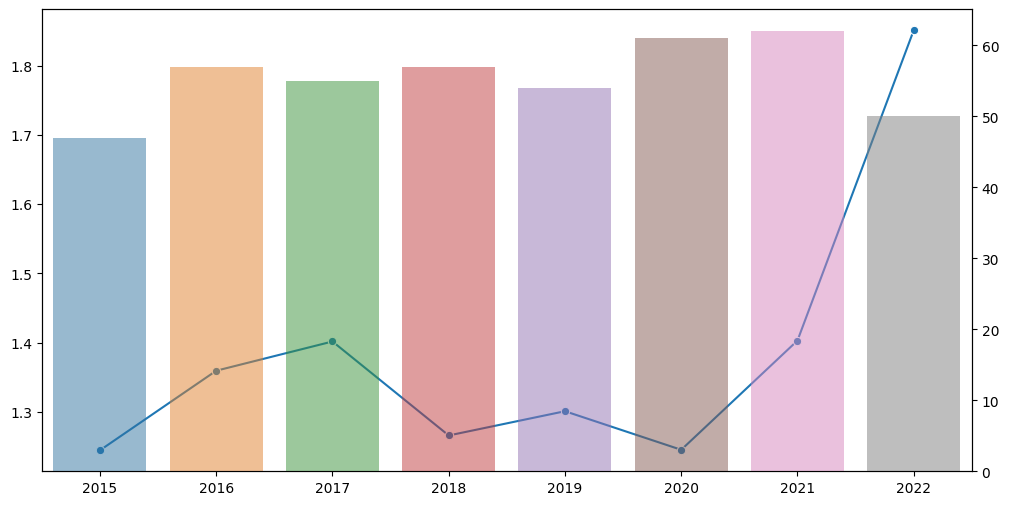

In [92]:
import matplotlib
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data=korea,x=korea['Year'].values,y=korea['Economy (GDP per Capita)'].values,marker='o',sort=False,ax=ax1)
ax2=ax1.twinx()
sns.barplot(data=korea,x=korea['Year'].values,y=korea['Happiness Rank'].values,alpha=0.5,ax=ax2)
# sns.barplot(x = korea['Year'], y = korea['Happiness Rank'], palette = "viridis")
# sns.lineplot(korea['Year'],korea['Economy (GDP per Capita)'])

##이제 버블차트를 그려볼것이다.

In [93]:
!pip install plotly
!pip install bubbly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5433 sha256=a5be34a7730e0a66ca5832e28183e41ed01eae987868a31e2d744b853defb4bb
  Stored in directory: /root/.cache/pip/wheels/85/c7/3d/38784ece9ac882d3afdb852ea8cf867df942fe6c71da5c4360
Successfully built bubbly


In [94]:
gapminder_indicators=pd.read_csv('/content/drive/Shareddrives/elice/gapminder.tsv',sep='\t')

In [95]:
gapminder_indicators["country"].replace('Congo, Dem. Rep.',"Congo",inplace = True)
gapminder_indicators["country"].replace("Hong Kong, China","Hong Kong",inplace = True)
gapminder_indicators["country"].replace("Korea, Dem. Rep.","Korea",inplace = True)
gapminder_indicators["country"].replace("Yemen, Rep.","Yemen",inplace = True)

In [96]:
def countryCode (country_name):
    try:
        return pc.country_name_to_country_alpha2(country_name)
    except:
        return None                  # None keyword adds a null value 🐹

if __name__ == "__main__":
    gapminder_indicators['Country code']= gapminder_indicators.apply(lambda x: countryCode(x.country), axis = 1)

In [97]:
# Adding a column with continent 🌡️
def continent(country_code):
    try:
        return pc.country_alpha2_to_continent_code(country_code)
    except:
        return None                  # None keyword adds a null value 🐹
    
if __name__ == "__main__":
    gapminder_indicators['Continent']= gapminder_indicators["Country code"].apply(lambda x: continent(x))

In [98]:
df_merged.columns

Index(['Happiness Rank', 'Country', 'Region', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family (Social Support)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year'],
      dtype='object')

In [99]:
df_merged.rename(columns={'Country':'country','Year':'year','Economy (GDP per Capita)':'gdpPercap','Health (Life Expectancy)':'lifeExp'},inplace=True)

In [100]:
df_merged.columns

Index(['Happiness Rank', 'country', 'Region', 'Happiness Score', 'gdpPercap',
       'Family (Social Support)', 'lifeExp', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'year'],
      dtype='object')

In [101]:
def countryCode (country_name):
    try:
        return pc.country_name_to_country_alpha2(country_name)
    except:
        return None                  # None keyword adds a null value 🐹

if __name__ == "__main__":
    df_merged['Country code']= df_merged.apply(lambda x: countryCode(x.country), axis = 1)

In [102]:
# Adding a column with continent 🌡️
def continent(country_code):
    try:
        return pc.country_alpha2_to_continent_code(country_code)
    except:
        return None                  # None keyword adds a null value 🐹
    
if __name__ == "__main__":
    df_merged['Continent']= df_merged["Country code"].apply(lambda x: continent(x))

In [103]:
# Let's inspect if there are any duplicate values 💣
data_info= pd.DataFrame()
data_info['Column Names']= df_merged[df_merged['year']=='2021'].columns
data_info['Datatype'] = df_merged[df_merged['year']=='2021'].dtypes.to_list()
data_info['Duplicate']= data_info['Column Names'].apply(lambda x: df_merged[df_merged['year']=='2021'][x].duplicated().sum())
data_info

,Column Names,Datatype,Duplicate
0,Happiness Rank,float64,0
1,country,object,0
2,Region,object,139
3,Happiness Score,float64,2
4,gdpPercap,float64,11
5,Family (Social Support),float64,14
6,lifeExp,float64,30
7,Freedom,float64,19
8,Trust (Government Corruption),float64,32
9,Generosity,float64,30


In [104]:
# Data copy 🧲
sample2 = df_merged.copy()
# Create a column with standard names of countries 🍄
def stname(country_name):
    try:
        return pc.country_name_to_country_alpha3(country_name)
    except:
        return None                  # None keyword adds a null value 🐹
    
if __name__ == "__main__":
    sample2['StNames']= sample2["country"].apply(lambda x: stname(x))

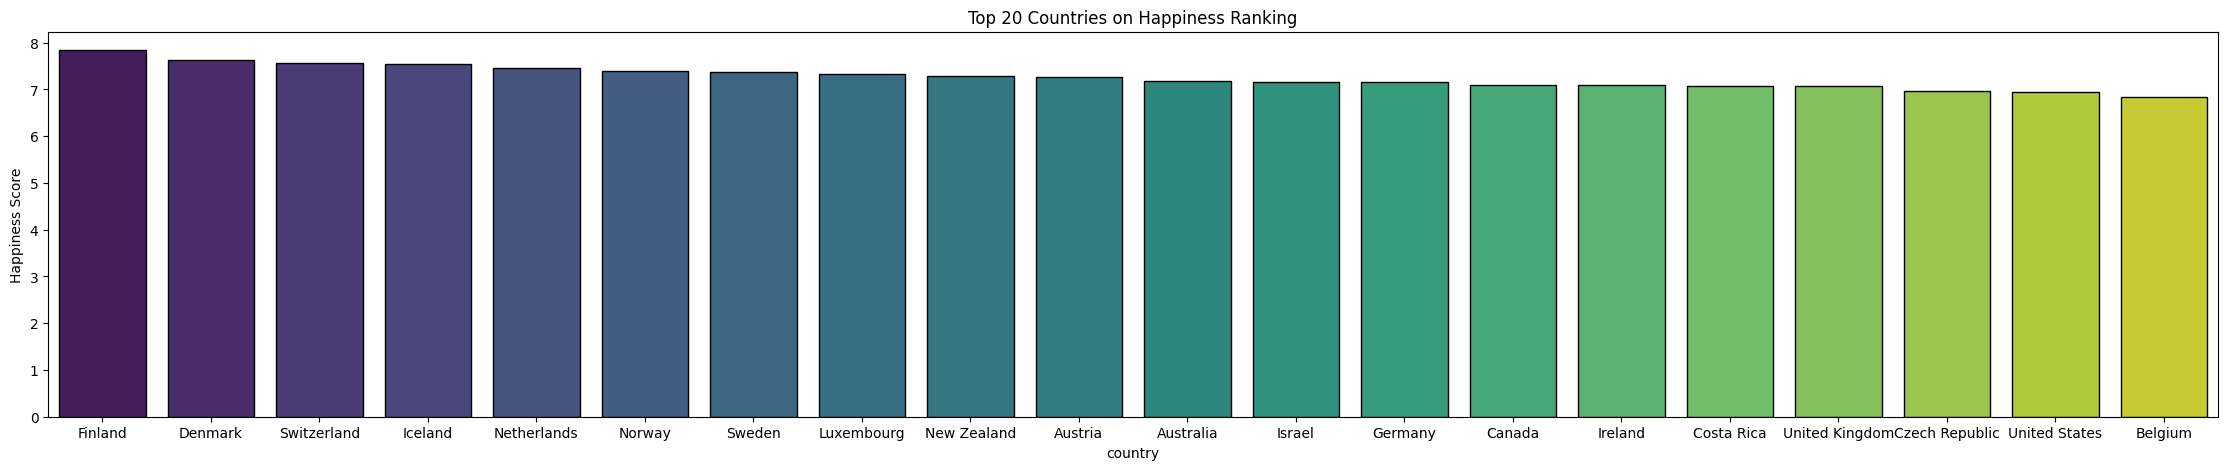

In [105]:
# World Map for Happiness Ranking 🦞
fig = px.choropleth(sample2, locations = "StNames", color = 'Happiness Rank',
                    scope = 'world', title = "Happiness Ranking World Map", color_continuous_scale= "viridis")

# A data frame with top 20 values 🌐
data = df_merged[df_merged['year']=='2021'].head(20) #다른연도를 보고싶으면 2021을 바꾸세요(2015~2022)

# Barplot for top 20 countries Happiness Index
plt.figure(figsize=(28,5))
plt.title("Top 20 Countries on Happiness Ranking")
sns.barplot(x = data["country"], y = data["Happiness Score"], data = data, palette='viridis', edgecolor='black')


fig.show()
plt.show()

In [106]:
from bubbly.bubbly import bubbleplot 
import plotly.express as px
from plotly.offline import iplot
figure = bubbleplot(dataset=gapminder_indicators, x_column='gdpPercap', y_column='lifeExp', 
    bubble_column='country', time_column='year', size_column='pop', color_column='continent', 
    x_title="GDP per Capita", y_title="Life Expectancy", title='Gapminder Global Indicators',
    x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

버블차트와 맵차트를 비교해보면서 대륙별로 행복도 변화의 이유을 찾아보려고 했으나 데이터셋의 년도가 일치하지 않아 실패ㅠㅠ
-> 추후 캐글 데이터뿐만이 아니라 크롤링해서 다른 데이터를 얻어야겠다.

#지도위에 내전이 일어난곳을 점으로 찍을것이다.

In [107]:
war=war.replace(0,2021)

In [108]:
war['bin']=war['yearend']-war['yearstart']

In [109]:
war.groupby(['yearstart','country']).size().values
#모두 1인것을 확인함 중복되지 않는다는 뜻

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [110]:
concap = pd.read_csv('/content/drive/Shareddrives/elice/concap.csv')
concap.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [111]:
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         war,left_on='CountryName',right_on='country')
#합쳐서 내전이 일어난 나라의 위도, 경도 표시해주자

In [112]:
data_full=pd.merge(data_full,gapminder_indicators,left_on='CountryName',right_on='country')
#gapminder_indicators와도 합쳐서 health, gdp 등을 알 수있는 데이터로 만들어주기
data_full.columns

Index(['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude',
       'yearstart', 'yearend', 'nameofwar', 'country_x', 'bin', 'country_y',
       'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'Country code',
       'Continent'],
      dtype='object')

두 데이터를 merge했지만 시점이 너무 다르다. 정제할 필요가 있음.

In [113]:
print(sorted(data_full['yearstart'].unique())) #내전 시작 년도
print(sorted(data_full['yearend'].unique())) #내전 시작 년도
print(sorted(data_full['year'].unique()))  #gdp, lifeExp등 다른 지표들있는 년도
#겹치는 년도가 1992, 2002, 2007 밖에없음..

[1990, 1991, 1993, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
[1999, 2000, 2001, 2002, 2003, 2005, 2006, 2007, 2015, 2018, 2021]
[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]


In [114]:
data_full.index= [i for i in range(0,data_full.shape[0])]

In [115]:
data_full.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            422, 423, 424, 425, 426, 427, 428, 429, 430, 431],
           dtype='int64', length=432)

In [116]:
index=[]
for i in range(0,data_full.shape[0]):
    print(data_full['year'].values[i])
    print(data_full['yearstart'].values[i])
    print(data_full['yearend'].values[i])
    print("="*10)
    if data_full['year'].values[i] >= data_full['yearstart'].values[i] and data_full['year'].values[i]<=data_full['yearend'].values[i]: continue
    else : index.append(i) 

1952
1996
2001
1957
1996
2001
1962
1996
2001
1967
1996
2001
1972
1996
2001
1977
1996
2001
1982
1996
2001
1987
1996
2001
1992
1996
2001
1997
1996
2001
2002
1996
2001
2007
1996
2001
1952
1997
1999
1957
1997
1999
1962
1997
1999
1967
1997
1999
1972
1997
1999
1977
1997
1999
1982
1997
1999
1987
1997
1999
1992
1997
1999
1997
1997
1999
2002
1997
1999
2007
1997
1999
1952
1998
2003
1957
1998
2003
1962
1998
2003
1967
1998
2003
1972
1998
2003
1977
1998
2003
1982
1998
2003
1987
1998
2003
1992
1998
2003
1997
1998
2003
2002
1998
2003
2007
1998
2003
1952
1996
2001
1957
1996
2001
1962
1996
2001
1967
1996
2001
1972
1996
2001
1977
1996
2001
1982
1996
2001
1987
1996
2001
1992
1996
2001
1997
1996
2001
2002
1996
2001
2007
1996
2001
1952
2001
2001
1957
2001
2001
1962
2001
2001
1967
2001
2001
1972
2001
2001
1977
2001
2001
1982
2001
2001
1987
2001
2001
1992
2001
2001
1997
2001
2001
2002
2001
2001
2007
2001
2001
1952
1996
2001
1957
1996
2001
1962
1996
2001
1967
1996
2001
1972
1996
2001
1977
1996
2001
1982
1996


In [117]:
f'제거전 : {data_full.shape[0]} 제거후 : {len(index)}'

'제거전 : 432 제거후 : 373'

In [118]:
data_full.drop(index, inplace=True)
data_full.tail()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,yearstart,yearend,nameofwar,country_x,bin,country_y,continent,year,lifeExp,pop,gdpPercap,Country code,Continent
394,Uganda,Kampala,0.316667,32.550000,1999,2007,Ituri conflict,Uganda,8,Uganda,Africa,2002,47.813,24739869,927.721002,UG,AF
395,Uganda,Kampala,0.316667,32.550000,1999,2007,Ituri conflict,Uganda,8,Uganda,Africa,2007,51.542,29170398,1056.380121,UG,AF
418,Yemen,Sanaa,15.350000,44.200000,1998,2021,Al-Qaeda insurgency in Yemen,Yemen,23,Yemen,Asia,2002,60.308,18701257,2234.820827,YE,AS
419,Yemen,Sanaa,15.350000,44.200000,1998,2021,Al-Qaeda insurgency in Yemen,Yemen,23,Yemen,Asia,2007,62.698,22211743,2280.769906,YE,AS
430,Zimbabwe,Harare,-17.816667,31.033333,1998,2003,Second Congo War,Zimbabwe,5,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZW,AF


전처리 완료 이제 시점이 겹치는 데이터들만 남게되었다.

In [119]:
data_full['year'].unique()

array([1997, 2002, 1992, 2007])

In [120]:
import plotly.graph_objects as go
data_full[data_full['year']==2002]['gdpPercap'] = data_full[data_full['year']==2002]['gdpPercap'].apply(lambda x: int(100*x))
data_full[data_full['year']==2002]['bin'] = data_full[data_full['year']==2002]['bin'].apply(lambda x: int(x))
fig = go.Figure()

fig.add_trace(go.Scattergeo(
                         lat = data_full[data_full['year']==2002]['CapitalLatitude'],
                     lon = data_full[data_full['year']==2002]['CapitalLongitude'],
                     text = data_full[data_full['year']==2002]['CountryName'],
#                     mode="markers+text",|
                     marker={
                        "color": data_full[data_full['year']==2002]['gdpPercap'],
                        "line": {"width": 1},
                 "size": data_full[data_full['year']==2002]['bin']}
                           ))

fig.update_layout(
    title_text="World wars"
)

fig.show()

In [121]:
# Data copy 🧲
sample3 = gapminder_indicators.copy()
# Create a column with standard names of countries 🍄
def stname(country_name):
    try:
        return pc.country_name_to_country_alpha3(country_name)
    except:
        return None                  # None keyword adds a null value 🐹
    
if __name__ == "__main__":
    sample3['StNames']= sample3["country"].apply(lambda x: stname(x))

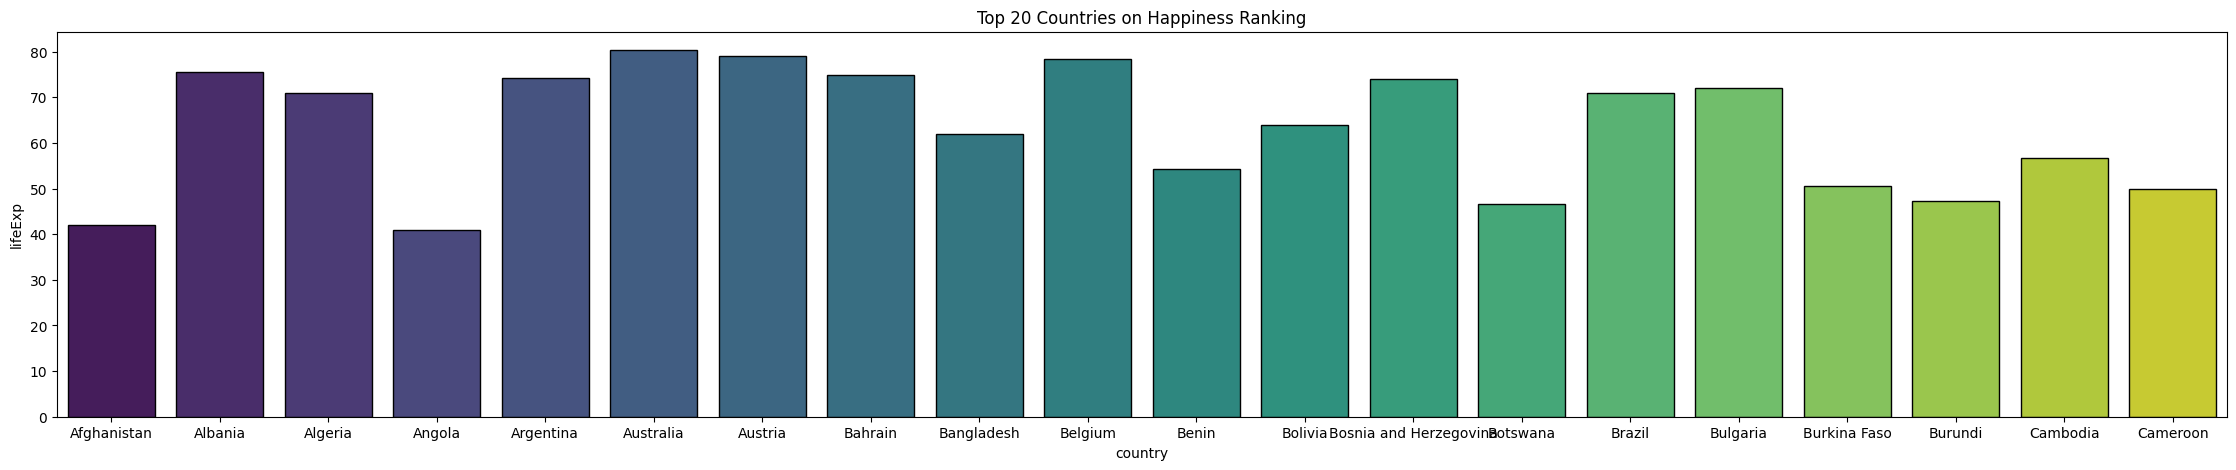

In [122]:
## 오피스아워 코드 디버깅
import plotly.express as px
import plotly.graph_objects as go


# World Map for Happiness Ranking 🦞
fig = px.choropleth(sample3, locations = "StNames", color = 'gdpPercap',
                    scope = 'world', title = "Happiness Ranking World Map", color_continuous_scale= "viridis") #fig변수에 그래프저장

# A data frame with top 20 values 🌐
data = gapminder_indicators[gapminder_indicators['year']==2002].head(20) #다른 시점을 보고싶다면 년도를 바꿔주세요! 1997, 2002, 1992, 2007

# Barplot for top 20 countries Happiness Index
plt.figure(figsize=(28,5))
plt.title("Top 20 Countries on Happiness Ranking")
sns.barplot(x = data["country"], y = data["lifeExp"], data = data, palette='viridis', edgecolor='black')

import plotly.graph_objects as go
data_full[data_full['year']==2002]['bin'] = data_full[data_full['year']==2002]['bin'].apply(lambda x: int(x))
# fig = go.Figure() #fig로 재정의 -> 빈그래프 객체가된다.

fig.add_trace(go.Scattergeo( #->빈그래프에 scatter 넣은것임
                         lat = data_full[data_full['year']==2002]['CapitalLatitude'],
                     lon = data_full[data_full['year']==2002]['CapitalLongitude'],
                     text = data_full[data_full['year']==2002]['CountryName'],
#                     mode="markers+text",|
                     marker={
                        "line": {"width": 1},
                 "size": data_full[data_full['year']==2002]['bin']}
                           ))

fig.update_layout(
    title_text="World wars"
)
fig.show()
plt.show()